<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/Perceptr%C3%B3n-multicapa/Perceptr%C3%B3n_multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Multicapa

In [32]:
import pandas as pd
%matplotlib inline


El perceptron es de una de las estructuras más simples. Está basada en una neurona ligeramente diferente llamada unidad logica de umbral(TLU) o a veces llamada  unidad lineal de umbral(LTU). Las entradas y las salidas son numeros cada entrada a la conexión se asocia con un peso. Esta unidad computa una suma ponderada de sus entradas y luego aplica una función de activacion, en este caso una función de escalon, a esta suma. 
$$z = w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = \boldsymbol{X^{T}}\boldsymbol{w}$$
$$h_{\boldsymbol{w}}(\boldsymbol{X}) = step(\boldsymbol{X^{T}}\boldsymbol{w})$$

 La función escalón más utilizada es la función escalón de Heaviside. La función de signo es utilizada también algunas veces.



In [ ]:
def heaviside(z):
  if z>=0:
    out = 1
  else:
    out = 0
  return out

In [ ]:
def sign(z):
  if z<0:
    out = -1
  elif z>0:
    out = 1
  else:
    out = 0
  return out  

La función escalón de Heaviside no es diferenciable en x=0 y tiene gradiente igual a cero en cualquier otro lugar, lo que significa que el descenso del gradiente no podrá actualizar los parametros. Por esta razón, está función no se utiliza en una red neuronal profunda.

In [ ]:

class Perceptron(nn.Module):
  def __init__(self):
    super(Perceptron, self).__init__()
    self.fc = nn.Linear(1,1)
    self.relu = nn.ReLU() # Instead of Heaviside step fn

  def forward(self, x):
    output =  self.fc(x)
    output = self.relu(x)
    return output


NameError: ignored

In [ ]:
class Feedforward(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Feedforward, self).__init__
    self.input_size = input_size
    self.hidden_size = hidden_size
    sel.f1 = nn.Linear(self.input_size, self.hidden_size)
    self.relu = nn.ReLU()
    self.fc2 =nn.Linear(self.hidden_size, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output) # Binary Classification
    return output

In [ ]:
#Create  artificial points
from sklearn.datasets import make_blobs
def blob_label(y, label, loc): 
  target = np.copy(y)
  for l in loc:
    target [y == l] = label
    return target
x_train, y_train = make_blobs(n_samples = 40, n_features=2, cluster_std = 1.5, shuffle = True)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(blob_label(y_train,0, [0]))
y_train = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))

x_test, y_test = make_blobs(n_samples = 10, n_features=2, cluster_std = 1.5, shuffle = True)
x_test = torch.FloatTensor(x_train)
y_test = torch.FloatTensor(blob_label(y_train,0, [0]))
y_test = torch.FloatTensor(blob_label(y_train, 1, [1,2,3]))







In [ ]:
model = Feedforward(2, 10)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.paramters(), lr = 0.01)

Este tipo de unidad se puede utilizar para realizar tareas simples de clasificación binaria. Por ejemplo, se podría utilizar un perceptrón para clasificar perros y gatos(tambien añadiendo un termino bias $x_{0}$).

Un Perceptrón está simplemente compuesto de una capa  con unidades logicas de umbral(TLU´s) con cada TLU conectado a todas las entradas. Cuando todas las unidades o neuronas de una capa están conectadas a cada neurona o unidad anterior(es decir, sus neuronas o unidades de entrada) se denomina una capa densa o totalmente conectada.

# Funciones de activación

---

Las funciones de activación cumplen dos roles muy importantes:
- En las partes internas del modelo permite que la función de salida tenga un valor de derivada diferente en diferentes puntos, algo que no lo puede lograr una función lineal por definición.
- Permiten concentrar las salidas de la función lineal en un rango de valores especificado.


---



## ¿Cómo escoger la función de activación?
Primero discutamos acerca de las generalidades de las funciones de activación:
- No son lineales: La no linealidad permite a la red aproximar funciones más complejas
- Son diferenciables: Esto significad que los gradientes se pueden calcular a través de ellas. Puntos de descontinuidad como se pueden ver en la función ReLu y Hardtanh están bien.

Sin estás caracteristicas, una red o se volverá dificil de entrenar o se coonvierte en un modelo lineal. 
Lo siguiente es cierto para estas funciones:
- Tienen por lo menos un rango sensitivo, donde un cambio no trivial en la entrada resulta en un cambio no trivial en la salida, lo cual es necesario para el entrenamiento
- Muchas de ellas tienen un rango no sensitivo(o sasturado ), en el cual los cambios en la entrada reflejan un cambio muy pequeño o casi despreciable en la salida. 


---


Si tenemos en cuenta la propagación hacía atrás, podemos deducir que los errores se propagarán a través de la función de activación de manera más eficaz,si las entradas se encuentran en el rango de respuesta(sensitivo) y pasará lo contrario cuando estén en en rango saturado, debido a que el gradiente será cercano a cero. 


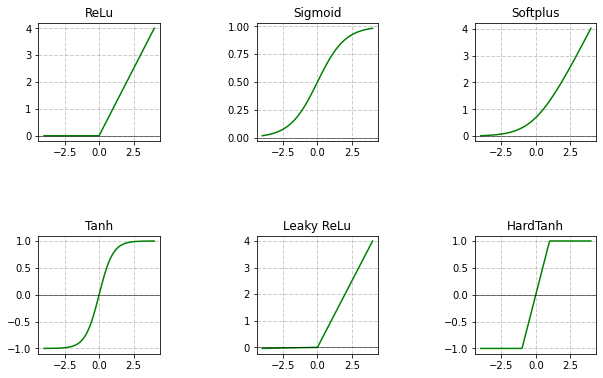

In [ ]:
## Algunas funciones de activación utilizando PyTorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


x_axe = np.linspace(-4, 4, 200)
input = torch.from_numpy(x_axe)
output_relu = nn.ReLU()(input).numpy() # ReLU
output_softmax = nn.Softplus()(input).numpy() # Softplus
output_sigmoid = nn.Sigmoid()(input).numpy() # Sigmoid
output_leakyR = nn.LeakyReLU()(input).numpy() # Leaky ReLu
output_tanh = nn.Tanh()(input).numpy() # Tanh
output_hardtanh = nn.Hardtanh()(input).numpy() # HardTanh
outputs1 = {'ReLu': output_relu, 'Sigmoid': output_sigmoid, 'Softplus': output_softmax, 
            'Tanh': output_tanh, 'Leaky ReLu': output_leakyR, 'HardTanh': output_hardtanh}
i = 1
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for key in outputs1.keys():
  ax = fig.add_subplot(3, 3, i)
  ax.plot(x_axe,outputs1[key],"g-")
  ax.set_title(key)
  ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  # Pintar los ejes pasando por (0,0)
  ax.axhline(0, color='black', linewidth=0.5)
  i+=1
plt.show()




Optimizadores
SGD
RMSPROP
Adam

In [ ]:
import torch.optim as optim
dir(optim)

Cada constructor de un optimizador toma una lista de parametros como primer argumento. Todos los parametros que son pasados al optimizador son retenidos dentro de esta instancia de modo que este puede actualizar sus valores y acceder al atributo .grad. Cada optimizador expone dos metodos zero_grad y step. 
zero_grad pone en cero el atributo .grad de los parametros pasados al optimizador mediante su constructor.
step actualiza el valor de estos parametros de acuerdo al metodo de optimización escogido

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
data_path =   './data'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import torchvision
batch_size = 8
trainloader = torch.utils.data.DataLoader(cifar10, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar10_val, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

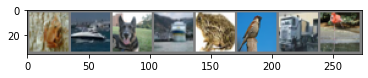

 frog  ship   dog  ship  frog  bird truck  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
images.shape

Keras implementación


In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.f1 = nn.Linear(32 * 32 * 3, 84)
    self.f2 = nn.Linear(84, 10)
    self.relu = torch.nn.ReLU()
    
  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x = self.relu(self.f1(x))
    x = self.f2(x)
    return x
mlp = MLP()

In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

keras


In [2]:
import tensorflow.keras as keras  
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print((y_train.shape))

In [ ]:
y_train.shape

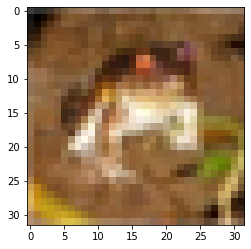

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [5]:
X_train = x_train.astype('float32') 
X_test = x_test.astype('float32') 
X_train = x_train / 255.0 
X_test = x_test / 255.0

In [ ]:
#X_train = X_train.reshape(-1,3072)
#X_test = X_test.reshape(-1, 3072)
#print(X_train.shape)

In [6]:
# one hot encode outputs se necesitan para softmax
from keras.utils import np_utils 
y_train2 = np_utils.to_categorical(y_train) 
y_test2 = np_utils.to_categorical(y_test) 
num_classes = y_test2.shape[1]

In [ ]:
num_classes

10

In [7]:
#one hot encoding
from keras.utils import np_utils
Y_train=y_train.reshape(-1,50000)
print(Y_train.shape)
#Y_train=np_utils.to_categorical(Y_train)
Y_test=y_test.reshape(-1,10000)
#Y_test=np_utils.to_categorical(Y_test)
num_class=Y_test.shape[0]

(1, 50000)


In [10]:
classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
import math
import random

def show_image_dataset(x_samples, y_labels, number_images, name_classes):

  grid_size = math.ceil(number_images / 4)
  fig = plt.figure(figsize=(number_images, number_images))

  for i in range(number_images):
    n = random.randint(0, x_samples.shape[0] + 1)
    fig.subplots_adjust(hspace=0.5, wspace=0.4)
    ax = fig.add_subplot(grid_size, grid_size, i+1)

    ax.set_title(name_classes[int(y_labels[n])], fontsize=30, color = 'black')
    ax.imshow(x_train[n])

  plt.show()

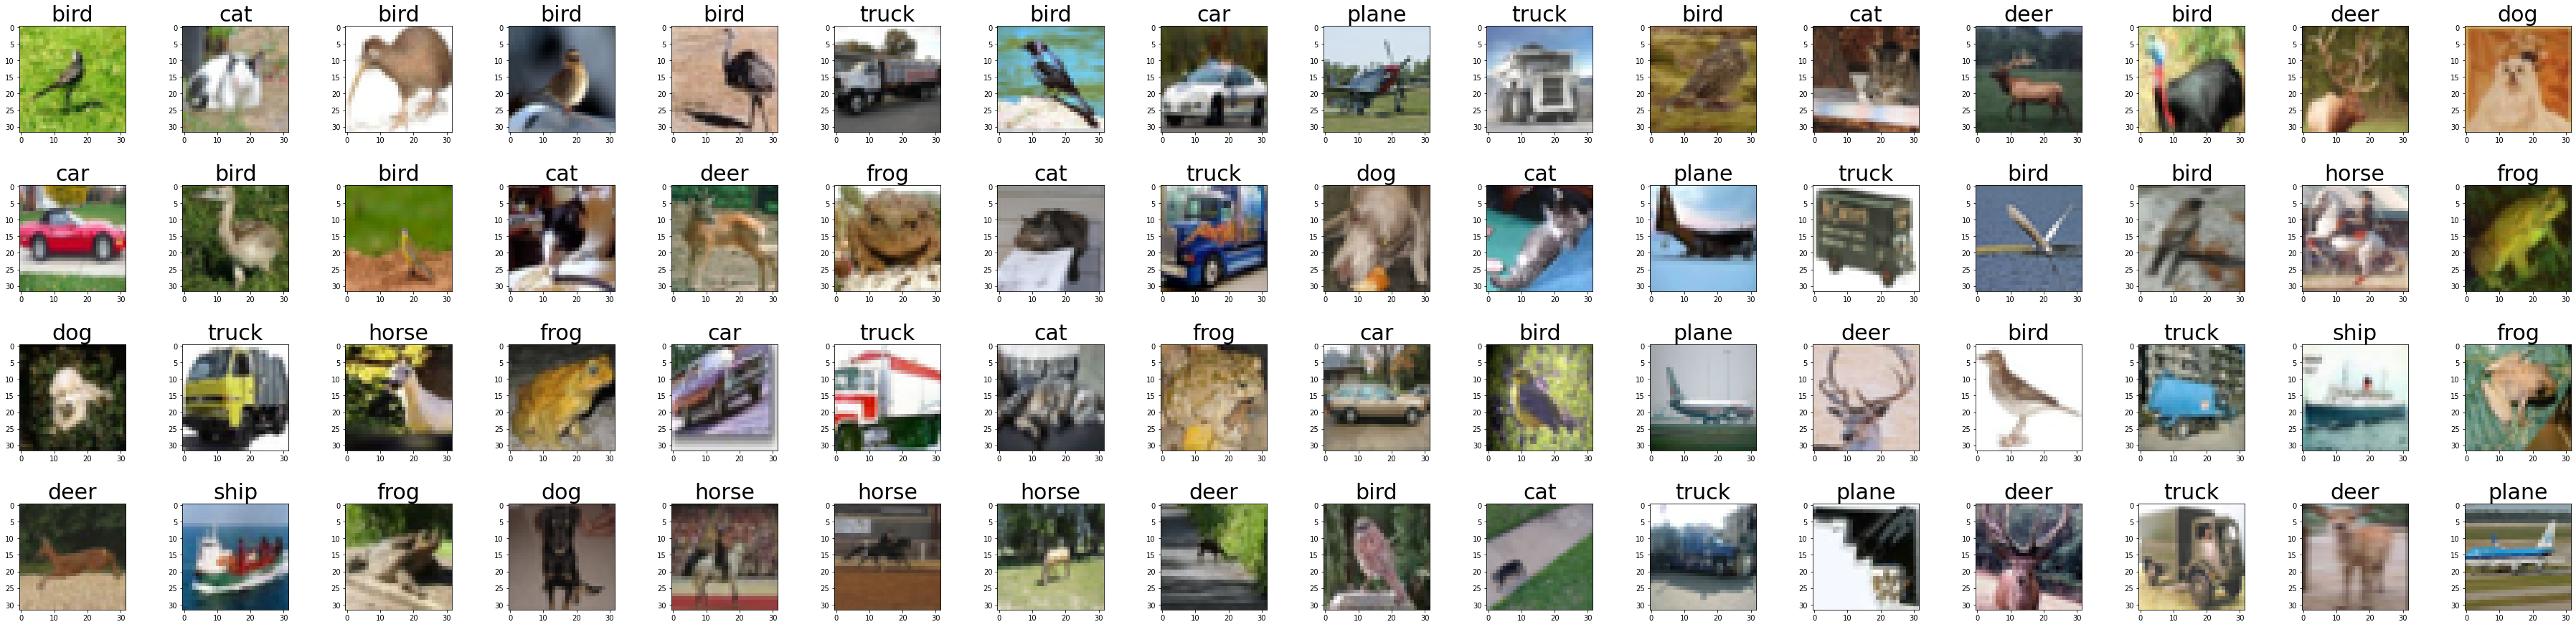

In [76]:
show_image_dataset(x_samples=X_train, y_labels=y_train,number_images=64, name_classes=classes)

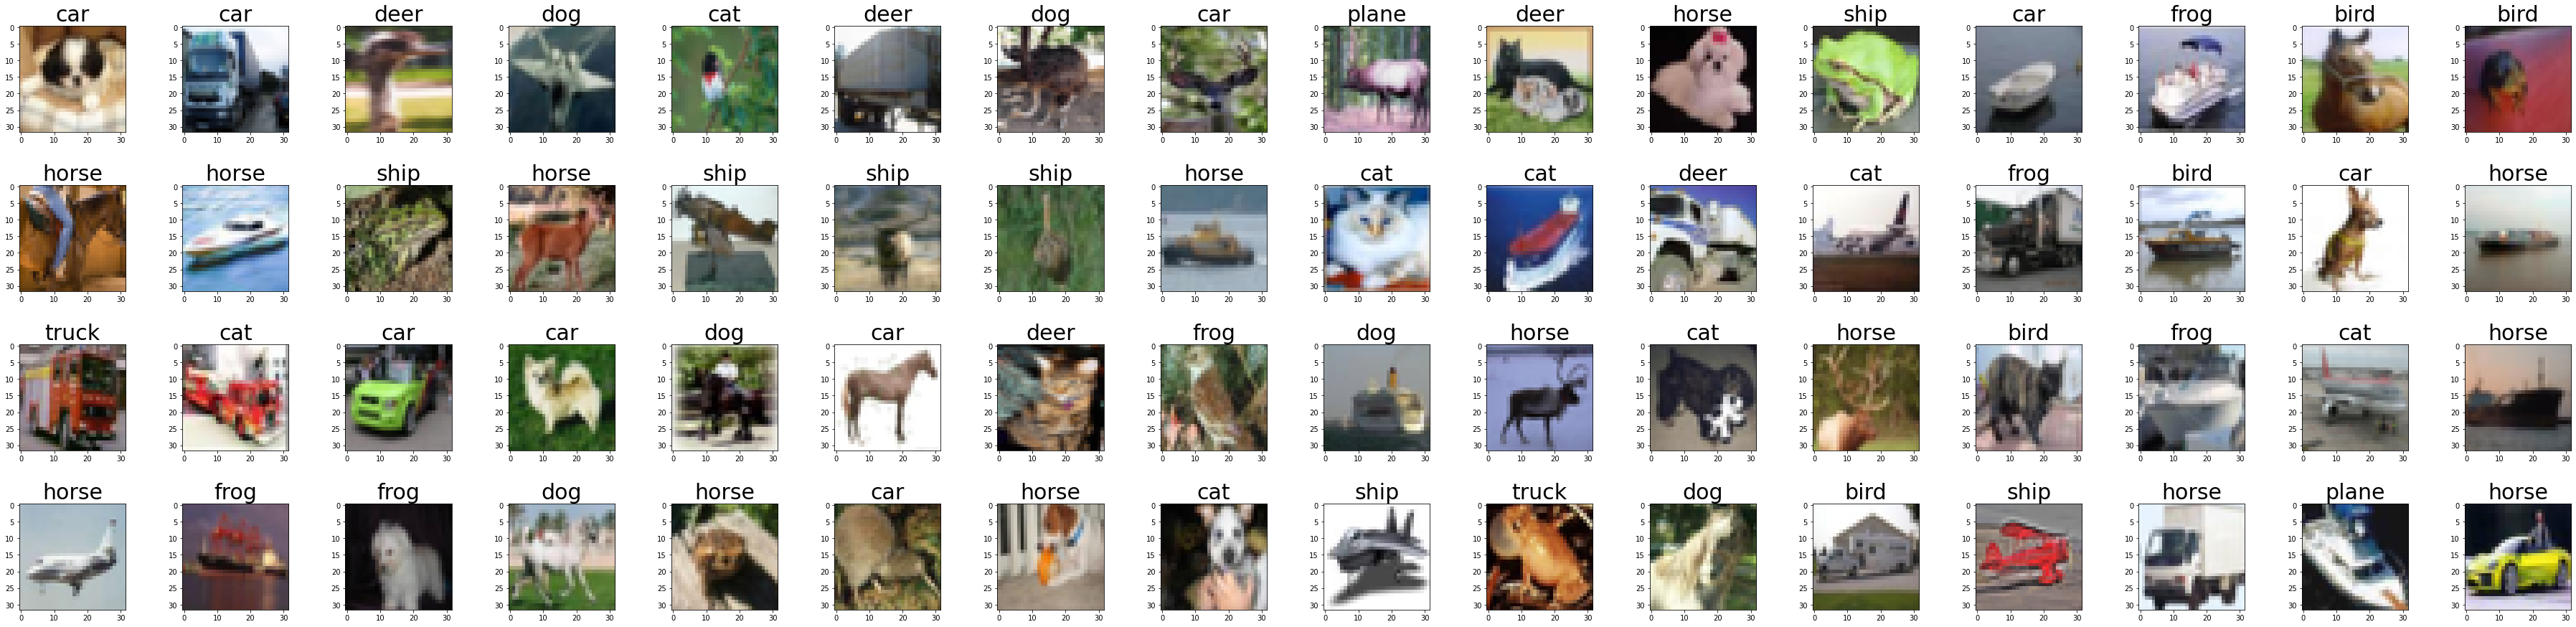

In [36]:
show_image_dataset(x_samples=x_test, y_labels=y_test,number_images=64, name_classes=classes)

In [12]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=[32,32,3]))

model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [13]:
# Compile model categorical
epochs = 100
lrate = 0.01 
decay = lrate/epochs 
sgd = keras.optimizers.SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False) 
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                43092     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                850       
Total params: 1,617,318
Trainable params: 1,617,318
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train2, epochs=10, batch_size=32) 

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8594 - accuracy: 0.3241
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6855 - accuracy: 0.3978
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6018 - accuracy: 0.4279
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5442 - accuracy: 0.4483
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4997 - accuracy: 0.4623
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4575 - accuracy: 0.4780
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4279 - accuracy: 0.4887
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3930 - accuracy: 0.5016
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3622 - accuracy: 0.5140
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.338

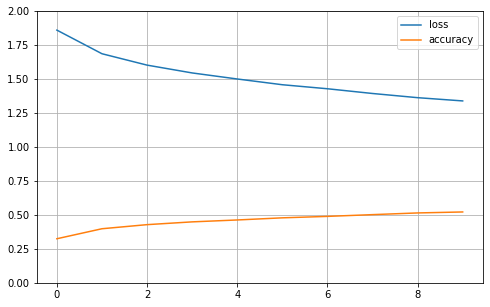

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

In [17]:
model.evaluate(X_test, y_test2)

313/313 [==============================] - 1s 2ms/step - loss: 1.4139 - accuracy: 0.4964


[1.4139490127563477, 0.49639999866485596]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.11, 0.15, 0.12, 0.24, 0.12, 0.05, 0.14, 0.01, 0.06, 0.  ],
       [0.08, 0.04, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.75, 0.12],
       [0.61, 0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.24, 0.04]],
      dtype=float32)

In [18]:
y_pred = np.argmax(model.predict(X_test), axis=1)


In [65]:
def show_test_data(x_test, y_test, y_pred, num_images, name_classes):

  grid_size = math.ceil(num_images / 4)
  fig = plt.figure(figsize = (num_images, num_images))

  for i in range(num_images):
    n = random.randint(0, x_test.shape[0] + 1)
    fig.subplots_adjust(hspace = 0.5, wspace = 0.4)
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    
    if y_pred[n] == y_test[n]:
      ax.set_title(name_classes[int(y_pred[n])], fontsize = 30, color = 'r' )
    else:
      ax.set_title(name_classes[int(y_pred[n])], fontsize = 30, color = 'b' )

    ax.imshow(x_test[n])

  plt.show()


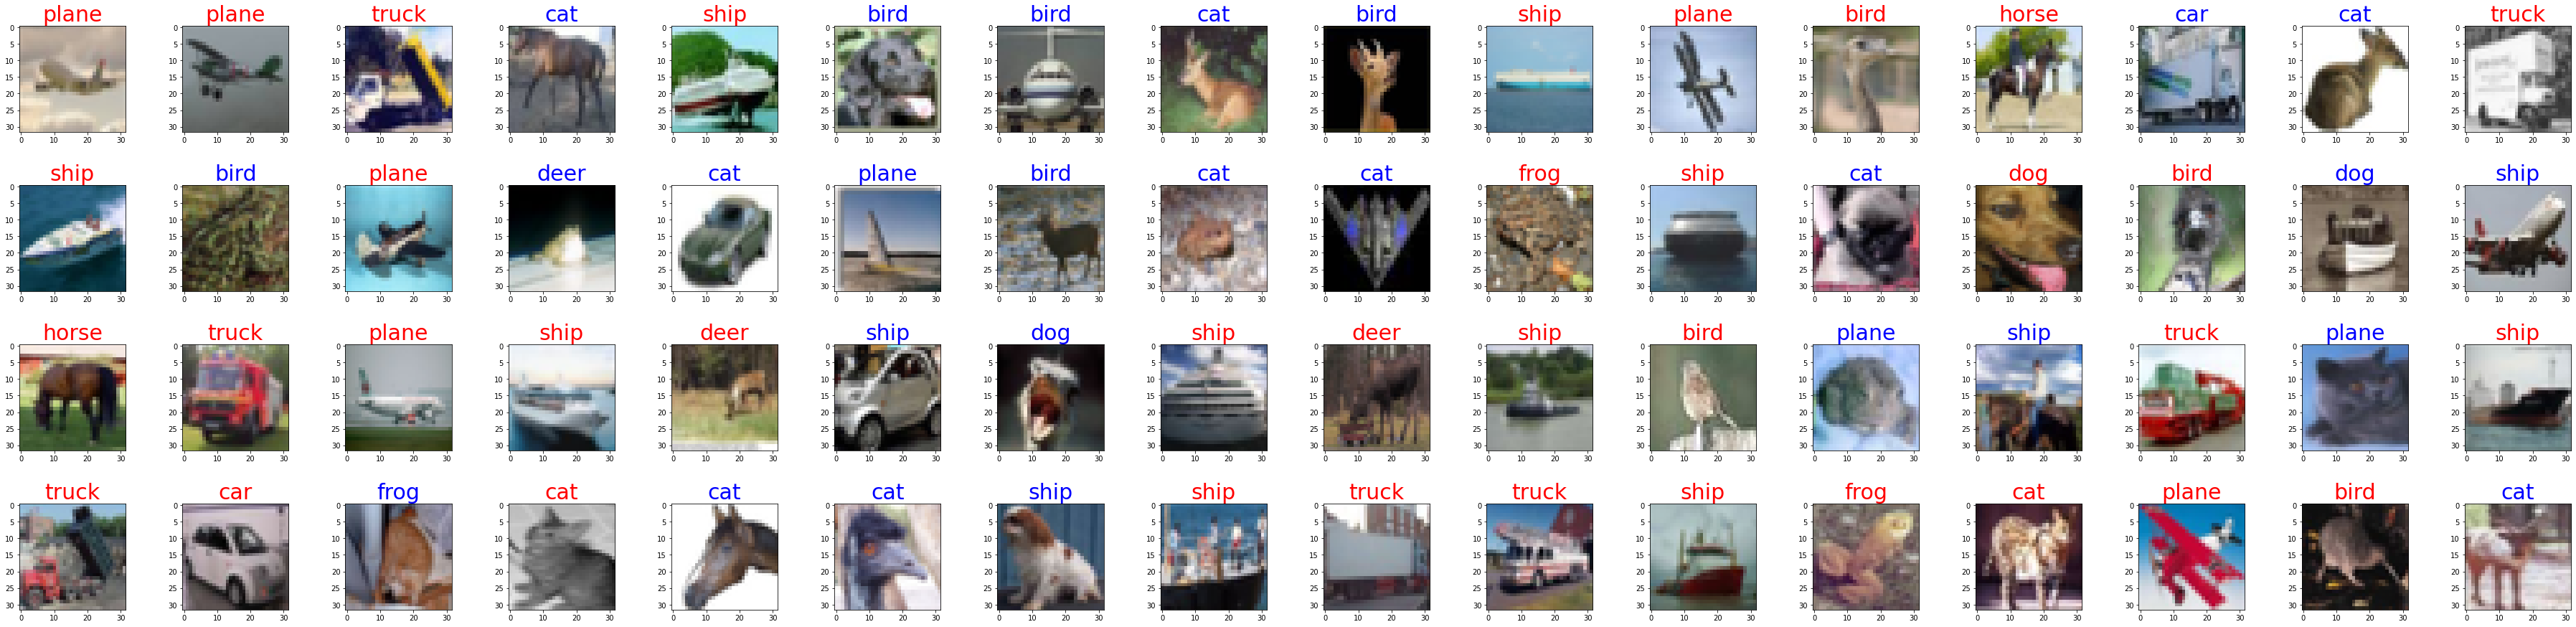

In [66]:
show_test_data(x_test=x_test, y_test=y_test, y_pred=y_pred, num_images=64, name_classes=classes)

In [67]:
## Functional API -- loss sparse_categorical_cross_entropy

inputs = keras.layers.Input(shape=[32,32,3])
flatten = keras.layers.Flatten()(inputs)
dense1 = keras.layers.Dense(512, activation = 'relu')
x = dense1(flatten)
dense2 = keras.layers.Dense(84, activation = 'relu')
x = dense2(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)

In [68]:
model2.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

In [69]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_4 (Dense)              (None, 84)                43092     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                850       
Total params: 1,617,318
Trainable params: 1,617,318
Non-trainable params: 0
_________________________________________________________________


In [70]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.8325 - accuracy: 0.3364
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6455 - accuracy: 0.4127
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5660 - accuracy: 0.4419
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5076 - accuracy: 0.4617
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4562 - accuracy: 0.4804
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4159 - accuracy: 0.4947
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3854 - accuracy: 0.5054
Epoch 8/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3514 - accuracy: 0.5185
Epoch 9/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.3259 - accuracy: 0.5276
Epoch 10/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.291

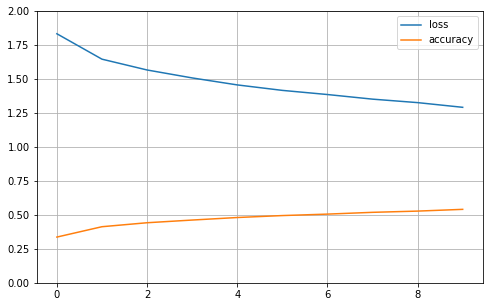

In [72]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) 
plt.show()

In [73]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3828 - accuracy: 0.5137


[1.3827805519104004, 0.513700008392334]

In [81]:
y_proba2 = model2.predict(X_test) 
y_pred2 = np.argmax(y_proba2, axis=1)

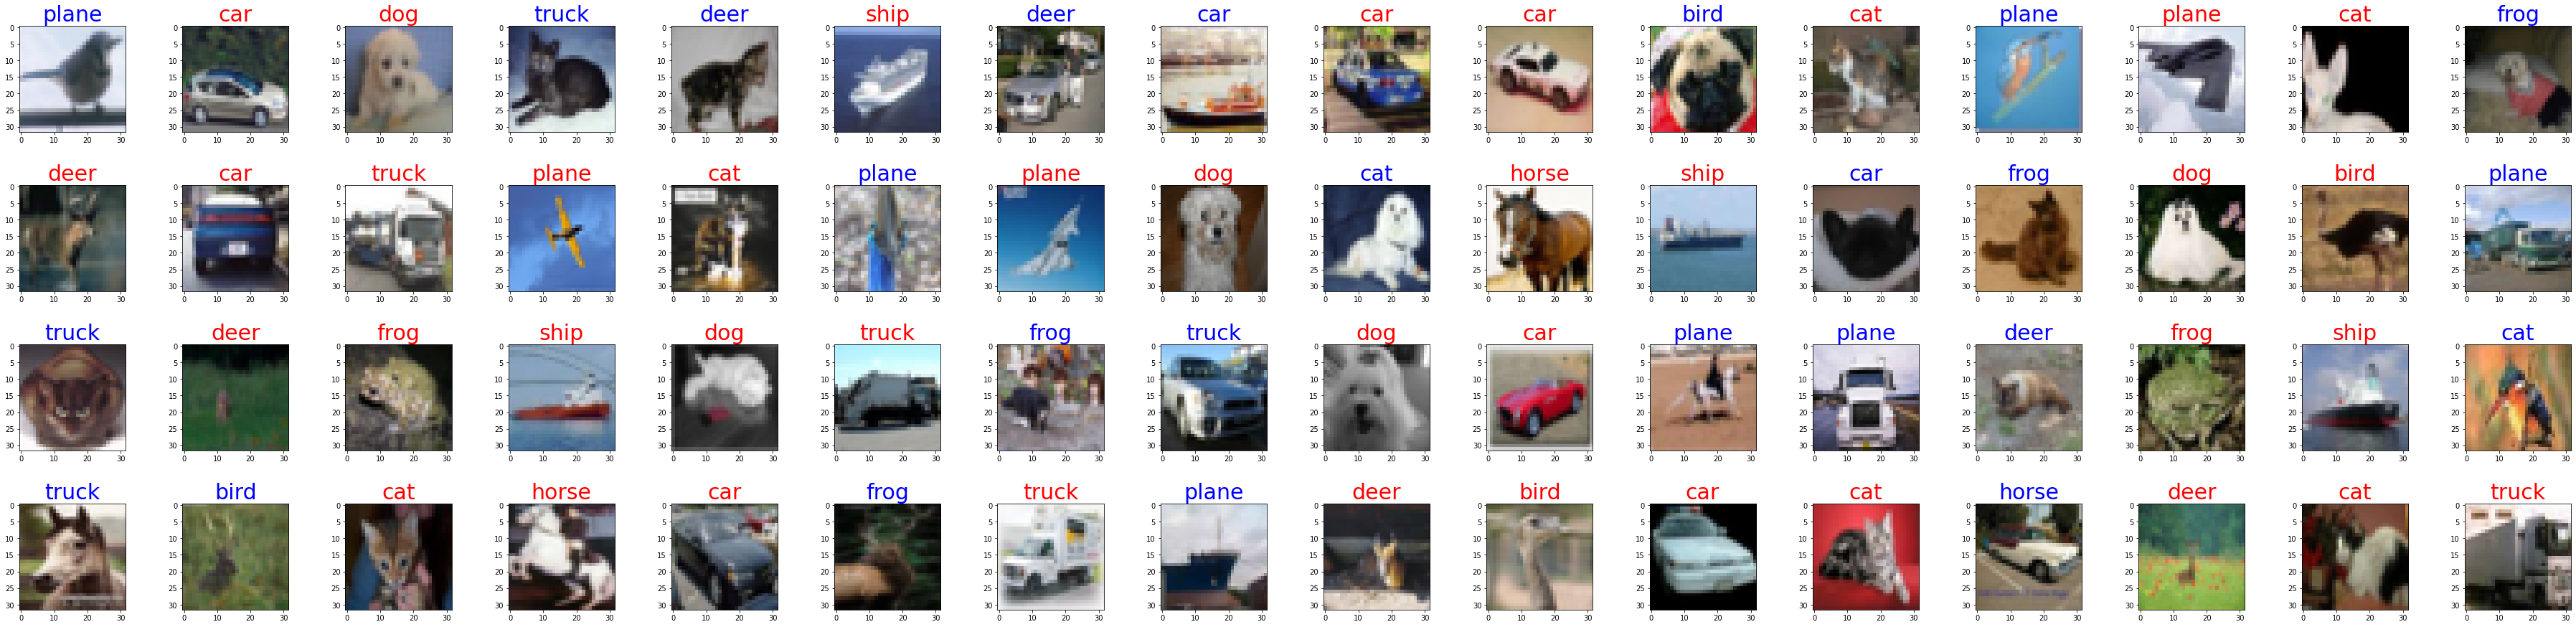

In [82]:
show_test_data(x_test=X_test, y_test=y_test, y_pred=y_pred2, num_images=64, name_classes=classes)